# d) Para el rango encontrado en (c), grafique con Octave los ingresos totales de la fábrica para todos los valores posibles de costos de la plancha 1 y 2.  

In [1]:
clear % eliminar todas las variables creadas previamente
clc % limpiar consola

## Función objetivo

In [2]:
function z = funcionobjetivo(x1,x2,c1)

    z = c1*x1+600*x2;

end


In [3]:
solOpt = [30,30] % x1,x2

solOpt =

   30   30



## Utilidad óptima total para distintos valores de los ingresos netos asociados a la plancha de aluminio tipo 1

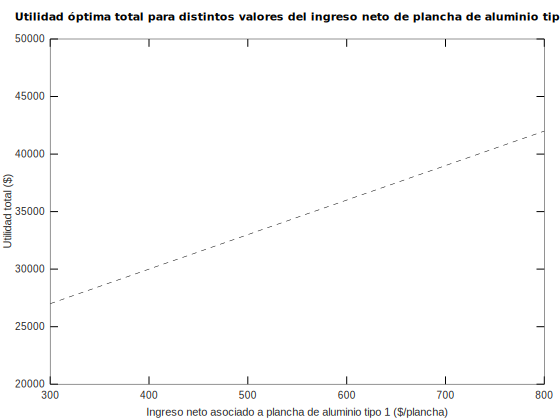

In [4]:
x1 = linspace(300,1800); %Rango de valores de input para las funciones

c1 = plot(x1,funcionobjetivo(solOpt(1),solOpt(2),x1),'--k'); 
hold on
title ('Utilidad óptima total para distintos valores del ingreso neto de plancha de aluminio tipo 1')
xlabel ('Ingreso neto asociado a plancha de aluminio tipo 1 ($/plancha)')
ylabel ('Utilidad total ($)')
xlim([300 800])
ylim([20000 50000])
hold off

## Con el optimizador de octave se verificará lo que ocurre para valores de ingresos netos fuera o dentro del rango utilizado para graficar

### Parámetros optimizador

In [5]:
%Matriz de restricciones
A=[7 14 1 0 0; 0.3 0.3 0 -1 0;15 5 0 0 1] 
%Vector con lado derecho de restricciones
b=[630;15;600]
%Límite inferior variables
lb=[0,0,0,0,0]  
%Límite superior variables
ub=[]
%Tipo de restricciones
ctype='SSS'
%Tipo de variables
vartype='CCCCC'
%Opción para el tipo de output del optimizador
param.msglev=2;

A =

    7.00000   14.00000    1.00000    0.00000    0.00000
    0.30000    0.30000    0.00000   -1.00000    0.00000
   15.00000    5.00000    0.00000    0.00000    1.00000

b =

   630
    15
   600

lb =

   0   0   0   0   0

ub = [](0x0)
ctype = SSS
vartype = CCCCC


### A continuación se verificará que para ingresos netos de la plancha 1 que están dentro del rango encontrado, la base óptima no cambia.

i) $c_1= 1799$

In [6]:
%Vector de costos de función objetivo
c=[1799 600 0 0 0]  
#Ejecución del optimizador
[xOpt,fOpt]= glpk(c=c,A=A,B=b,lb=lb,ub=ub,ctype=ctype,vartype=vartype,s=-1,param=param)

c =

   1799    600      0      0      0

      0: obj =  -0.000000000e+00 inf =   4.518e+01 (1)
      2: obj =   4.199000000e+04 inf =   0.000e+00 (0)
*     3: obj =   7.197000000e+04 inf =   0.000e+00 (0)
xOpt =

   30.00000
   30.00000
    0.00000
    3.00000
    0.00000

fOpt =  71970


ii) $c_1= 301$

In [7]:
%Vector de costos de función objetivo
c=[301 600 0 0 0]  
#Ejecución del optimizador
[xOpt,fOpt]= glpk(c=c,A=A,B=b,lb=lb,ub=ub,ctype=ctype,vartype=vartype,s=-1,param=param)

c =

   301   600     0     0     0

      0: obj =  -0.000000000e+00 inf =   4.518e+01 (1)
      2: obj =   2.701000000e+04 inf =   0.000e+00 (0)
*     3: obj =   2.703000000e+04 inf =   0.000e+00 (0)
xOpt =

   30.00000
   30.00000
    0.00000
    3.00000
    0.00000

fOpt =  27030.00000


* Ahora se verificará que para ingreso netos de la plancha 1 fuera del rango encontrado, la base óptima cambia.

iii) $c_1 = 1801$

In [8]:
c=[1801 600 0 0 0]  
#Ejecución del optimizador
[xOpt,fOpt]= glpk(c=c,A=A,B=b,lb=lb,ub=ub,ctype=ctype,vartype=vartype,s=-1,param=param)

c =

   1801    600      0      0      0

      0: obj =  -0.000000000e+00 inf =   4.518e+01 (1)
      2: obj =   4.201000000e+04 inf =   0.000e+00 (0)
*     4: obj =   7.203500000e+04 inf =   0.000e+00 (0)
xOpt =

    35.00000
    15.00000
   175.00000
     0.00000
     0.00000

fOpt =  72035


Si el ingreso neto es mayor a 1800 (1801 > 1800), $x_4$ sale de la base y $x_3$ entra a la base <br/> Es decir, respecto al caso original, la restricción asociada a la pintura se vuelve activa <br/> y la restricción asociada a la disponibilidad de aluminio bruto deja de ser activa 

iv) $c_1 = 299$

In [9]:
c=[299 600 0 0 0]  
#Ejecución del optimizador
[xOpt,fOpt]= glpk(c=c,A=A,B=b,lb=lb,ub=ub,ctype=ctype,vartype=vartype,s=-1,param=param)

c =

   299   600     0     0     0

      0: obj =  -0.000000000e+00 inf =   4.518e+01 (1)
      2: obj =   2.699000000e+04 inf =   0.000e+00 (0)
xOpt =

    10.00000
    40.00000
     0.00000
     0.00000
   250.00000

fOpt =  26990


Si el ingreso neto es menor a 300 (299 < 300), $x_4$ sale de la base y $x_5$ entra a la base <br/> Es decir, respecto al caso original, la restricción ascoiada a la pintura se vuelve activa <br/> y la restricción asociada a la mano de obra (o trabajo) deja de ser activa

## * Repita el ejercicio de forma personal para los ingresos netos asociados a la plancha de aluminio tipo 2